In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import random
from tqdm import tqdm
warnings.filterwarnings('ignore')
tqdm.pandas()

In [2]:
import matplotlib.font_manager as fm

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
plt.rcParams['font.family'] = 'Nanum'

In [3]:
df_01 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv')
df_02 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv')
df_03 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_03_COP_U.csv')
df_04 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv')
df_05 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_05_BR.csv')
df_06 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_06_LPAY.csv')

In [4]:
df_03.drop(columns=['rct_no', 'vst_dt'], axis=1, inplace=True)

In [5]:
df_03['buy_am'].describe()

count    2.483040e+05
mean     2.013066e+04
std      2.430121e+05
min      1.000000e+00
25%      5.000000e+03
50%      9.000000e+03
75%      1.580000e+04
max      7.009200e+07
Name: buy_am, dtype: float64

In [6]:
def categoricalBuy(data):
    res = 0
    
    if data < 1000:
        res = 0
    elif data >= 1000 and data < 9000:
        res = 1
    elif data >= 9000 and data < 15800:
        res = 2
    else:
        res = 3
        
    return res

In [7]:
df_03['buy_am'] = df_03.progress_apply(lambda x : categoricalBuy(x['buy_am']), axis=1)

100%|███████████████████████████████| 248304/248304 [00:01<00:00, 147106.03it/s]


In [51]:
import preprocessing as pre

df = pre.parallel_dataframe(df_03, pre.copMakeRatings, cores=6)

100%|████████████████████████████████████| 41384/41384 [02:19<00:00, 295.74it/s]


In [53]:
df['ratings'] = np.abs(df['ratings'])
df['ratings'].unique()

array([ 7.7,  7.8,  7.1,  8. ,  1.9,  6.8,  2.3,  6.6,  6.7,  7.4,  7. ,
        6.5,  7.2,  1.8,  2.2,  6.9,  2.1,  7.5,  9.3,  9.4,  9.5, 10. ,
        9.9,  9.7,  9.8, 10.1,  9.6,  0. ,  5.4,  6. ,  6.3,  5.7,  6.2,
        9.1,  1.4,  7.6,  8.3,  9.2,  9. ,  1.3,  3.3,  3.8,  5.5,  5.6,
        5.9,  1.1,  1.2,  3.5,  8.6,  0.2,  8.8,  6.1,  3.4,  3. ,  7.3,
        2.6,  2.4,  2.5,  8.1,  7.9,  1.6,  6.4,  3.1,  1.5,  2.9,  5.3,
        5.8,  4.3,  4.6,  0.9,  2. ,  4.4,  2.8,  4.2,  0.8,  5. ,  4.8,
        1. ,  8.4,  5.2,  3.2,  4. ,  4.1,  3.7,  3.6,  4.9,  4.5,  4.7,
        8.2,  0.7,  0.1,  5.1,  1.7,  0.6,  8.7,  8.5,  3.9,  2.7,  0.5,
        0.4,  0.3,  8.9])

In [39]:
df.to_csv('../dataset/cop_c_ratings.csv')

In [10]:
df_02 = pd.merge(df_02, df_04, on='pd_c')
df_02

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의
1,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
4,M506355556,A01000107137,1,A01,A010032,PD0290,20210101,15,199000.0,1,남성티셔츠,남성의류,남성의류상의
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M696533418,E06045892016,2,A06,NaN,PD0520,20211115,0,9900.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381739,M696533418,E06045892016,2,A06,NaN,PD0520,20211115,0,9900.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381740,M111856694,E06045887405,2,A06,NaN,PD0520,20211118,0,100.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381741,M001808316,E06045891296,2,A06,NaN,PD0520,20211118,0,100.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스


In [9]:
import preprocessing as pre

In [11]:
df_02_ratings = pre.parallel_dataframe(df_02, pre.make_ratings, 6)

100%|████████████████████████████████| 730290/730290 [11:23:13<00:00, 17.81it/s]


In [12]:
df_02_ratings.to_csv('../dataset/df_02_ratings.csv')

### ------------------------------------------------------------------------------------

In [8]:
df_cop = pd.read_csv('../dataset/cop_c_ratings.csv')
df_cop.drop('Unnamed: 0', axis=1, inplace=True)
df_cop

,cust,cop_c,br_c,chnl_dv,de_dt,de_hr,buy_am,ratings
0,M839993508,B01,B010012,1,20211026,12,3,7.8
1,M839993508,B01,B010012,1,20211106,10,3,7.9
2,M839993508,B01,B010012,1,20210211,12,3,7.9
3,M839993508,B01,B010012,1,20210920,10,3,7.8
4,M839993508,D01,D010614,1,20211010,9,1,2.0
...,...,...,...,...,...,...,...,...
248299,M058650684,C02,C020002,1,20211116,14,1,10.0
248300,M058650684,C02,C020002,1,20211116,19,3,10.0
248301,M014154595,C01,C010087,2,20211212,9,1,9.2
248302,M510878172,C01,C010007,2,20211127,19,1,9.7


In [9]:
df_product = pd.read_csv('../dataset/df_02_ratings.csv')
df_product['buy_am'] = df_product.progress_apply(lambda x : categoricalBuy(x['buy_am']), axis=1)

100%|█████████████████████████████| 4381743/4381743 [00:30<00:00, 142449.32it/s]


In [10]:
# df_product.drop('Unnamed: 0', axis=1, inplace=True)
df_product['br_c'].fillna('empty', inplace=True)

In [11]:
df_cop['de_dt'] = df_cop['de_dt'].astype('int64')
df_cop['de_dt'] = df_cop['de_dt'].astype('str')
df_cop.dropna(axis=0, inplace=True)

df_product['de_dt'] = df_product['de_dt'].astype('int64')
df_product['de_dt'] = df_product['de_dt'].astype('str')
df_product.dropna(axis=0, inplace=True)

In [12]:
df_product_cop = df_product[['cust', 'cop_c', 'br_c', 'chnl_dv','de_hr', 'de_dt', 'buy_am', 'ratings']]
df_product_cop

,cust,cop_c,br_c,chnl_dv,de_hr,de_dt,buy_am,ratings
0,M430112881,A01,A010039,1,10,20210101,2,4.62
1,M430112881,A01,A010039,1,10,20210101,3,4.62
2,M430112881,A01,A010039,1,10,20210101,3,4.62
3,M430112881,A01,A010039,1,10,20210101,3,4.62
4,M506355556,A01,A010032,1,15,20210101,3,9.45
...,...,...,...,...,...,...,...,...
4381738,M696533418,A06,empty,2,0,20211115,2,0.45
4381739,M696533418,A06,empty,2,0,20211115,2,0.45
4381740,M111856694,A06,empty,2,0,20211118,0,9.99
4381741,M001808316,A06,empty,2,0,20211118,0,0.00


In [13]:
weather_df = pd.read_csv('../dataset/weather.csv', encoding='euc-kr', skiprows=6)
weather_df['날짜'] = weather_df['날짜'].astype('str')
weather_df['날짜'] = weather_df['날짜'].str.replace(pat=r'-',repl=r'',regex=True)
weather_df['날짜'].astype('int64')

weather_df = weather_df.rename(columns={'날짜' : 'de_dt', '평균기온(℃)': '평균기온'})
weather_df.drop(columns=['지점', '최저기온(℃)', '최고기온(℃)'], axis=1, inplace=True)
weather_df

,de_dt,평균기온
0,20210101,-3.4
1,20210102,-2.8
2,20210103,-3.3
3,20210104,-2.0
4,20210105,-2.2
...,...,...
360,20211227,-4.6
361,20211228,0.0
362,20211229,2.5
363,20211230,-0.7


### start

In [14]:
df_concat_cop_product = pd.concat([df_product_cop, df_cop])
df_concat_cop_product

,cust,cop_c,br_c,chnl_dv,de_hr,de_dt,buy_am,ratings
0,M430112881,A01,A010039,1,10,20210101,2,4.62
1,M430112881,A01,A010039,1,10,20210101,3,4.62
2,M430112881,A01,A010039,1,10,20210101,3,4.62
3,M430112881,A01,A010039,1,10,20210101,3,4.62
4,M506355556,A01,A010032,1,15,20210101,3,9.45
...,...,...,...,...,...,...,...,...
248299,M058650684,C02,C020002,1,14,20211116,1,10.00
248300,M058650684,C02,C020002,1,19,20211116,3,10.00
248301,M014154595,C01,C010087,2,9,20211212,1,9.20
248302,M510878172,C01,C010007,2,19,20211127,1,9.70


In [15]:
df_cop_weather = pd.merge(df_concat_cop_product, weather_df, on='de_dt')
df_cop_weather.isna().sum()

cust       0
cop_c      0
br_c       0
chnl_dv    0
de_hr      0
de_dt      0
buy_am     0
ratings    0
평균기온       0
dtype: int64

In [16]:
df_cop_weather.rename(columns= {'평균기온' : 'aver_temp'}, inplace=True)

In [17]:
df_cop_weather

,cust,cop_c,br_c,chnl_dv,de_hr,de_dt,buy_am,ratings,aver_temp
0,M430112881,A01,A010039,1,10,20210101,2,4.62,-3.4
1,M430112881,A01,A010039,1,10,20210101,3,4.62,-3.4
2,M430112881,A01,A010039,1,10,20210101,3,4.62,-3.4
3,M430112881,A01,A010039,1,10,20210101,3,4.62,-3.4
4,M506355556,A01,A010032,1,15,20210101,3,9.45,-3.4
...,...,...,...,...,...,...,...,...,...
4616641,M603445400,C01,C010087,2,19,20211118,3,9.20,9.8
4616642,M914963204,D01,D011330,1,14,20211118,1,7.20,9.8
4616643,M914963204,D01,D011308,1,16,20211118,1,6.30,9.8
4616644,M343659173,C01,C010043,1,21,20211118,1,9.90,9.8


In [18]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

columns = ['cust']

for i in columns:
    globals()[f'encoder_{i}'] = LabelEncoder()
    df_cop_weather[i] = globals()[f'encoder_{i}'].fit_transform(df_cop_weather[i]) 

In [19]:
df_cop_weather.head(3)

,cust,cop_c,br_c,chnl_dv,de_hr,de_dt,buy_am,ratings,aver_temp
0,12828,A01,A010039,1,10,20210101,2,4.62,-3.4
1,12828,A01,A010039,1,10,20210101,3,4.62,-3.4
2,12828,A01,A010039,1,10,20210101,3,4.62,-3.4


### inverse

In [20]:
globals()['encoder_cust'].inverse_transform([12828])

array(['M430112881'], dtype=object)

In [21]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_cop_weather, test_size=0.2, random_state=52)
print(train.shape, test.shape)

(3693316, 9) (923330, 9)


In [22]:
number_of_unique_user = len(df_cop_weather['cust'].unique())
number_of_unique_buy = len(df_cop_weather['buy_am'].unique())
number_of_unique_weather = len(df_cop_weather['aver_temp'].unique())
number_of_unique_hour = len(df_cop_weather['de_hr'].unique())
number_of_uniuqe_cop = len(df_cop_weather['cop_c'].unique())
print(number_of_unique_user, number_of_unique_buy, number_of_unique_weather, number_of_unique_hour, number_of_uniuqe_cop)

29756 4 211 24 12


In [23]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model

In [54]:
buy_input = Input(shape=(1,), name='buy_input_layer')
user_input = Input(shape=(1,), name='user_input_layer')
weather_input = Input(shape=(1,), name='weather_input_layer')
hour_input = Input(shape=(1,), name='hour_input_layer')

buy_embedding_layer = Embedding(number_of_unique_buy + 1, 100, name='buy_embedding_layer')
user_embedding_layer = Embedding(number_of_unique_user + 1, 100, name='user_embedding_layer')
weather_embedding_layer = Embedding(number_of_unique_weather + 1, 100, name='weather_embedding_layer')
hour_embedding_layer = Embedding(number_of_unique_hour + 1, 100, name='hour_embedding_layer')

product_vector_layer = Flatten(name='buy_vector_layer')
user_vector_layer = Flatten(name='user_vector_layer')
weather_vector_layer = Flatten(name='weather_vector_layer')
hour_vector_layer = Flatten(name='hour_vector_layer')

dot_buy_hour_layer = Dot(name='buy_hour_layer', axes = 1)
dot_user_weather_layer = Dot(name='user_weather_layer', axes = 1)

dot_result_layer = Dot(name='dot_vector_layer', axes = 1)

concate_layer = Concatenate()

dense_layer1 = Dense(512, activation='relu')
dense_layer2 = Dense(256, activation='relu')
dense_layer3 = Dense(128, activation='relu')
dense_layer4 = Dense(32, activation='relu')

cop_result_layer = Dense(number_of_uniuqe_cop, activation='softmax', name='cop_result')

In [55]:
buy_embedding = buy_embedding_layer(buy_input)
user_embedding = user_embedding_layer(user_input)
weather_embedding = weather_embedding_layer(weather_input)
hour_embedding = hour_embedding_layer(hour_input)

buy_vector = product_vector_layer(buy_embedding)
user_vector = user_vector_layer(user_embedding)
weather_vector = weather_vector_layer(weather_embedding)
hour_vector = hour_vector_layer(hour_embedding)

buy_hour_dot = dot_buy_hour_layer([buy_vector, user_vector])
user_weather_dot = dot_user_weather_layer([user_vector, weather_vector])

rating_result = dot_result_layer([buy_hour_dot, user_weather_dot])

concat = concate_layer([buy_vector, user_vector, weather_vector, hour_vector])
dense1 = dense_layer1(concat)
dense2 = dense_layer2(dense1)
dense3 = dense_layer3(dense2)
dense4 = dense_layer4(dense3)

cop_result = cop_result_layer(dense4)

model = Model(inputs=[buy_input, user_input, weather_input, hour_input], outputs=[rating_result, cop_result])

In [56]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 buy_input_layer (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 user_input_layer (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 weather_input_layer (InputLaye  [(None, 1)]         0           []                               
 r)                                                                                               
                                                                                                  
 hour_input_layer (InputLayer)  [(None, 1)]          0           []                         

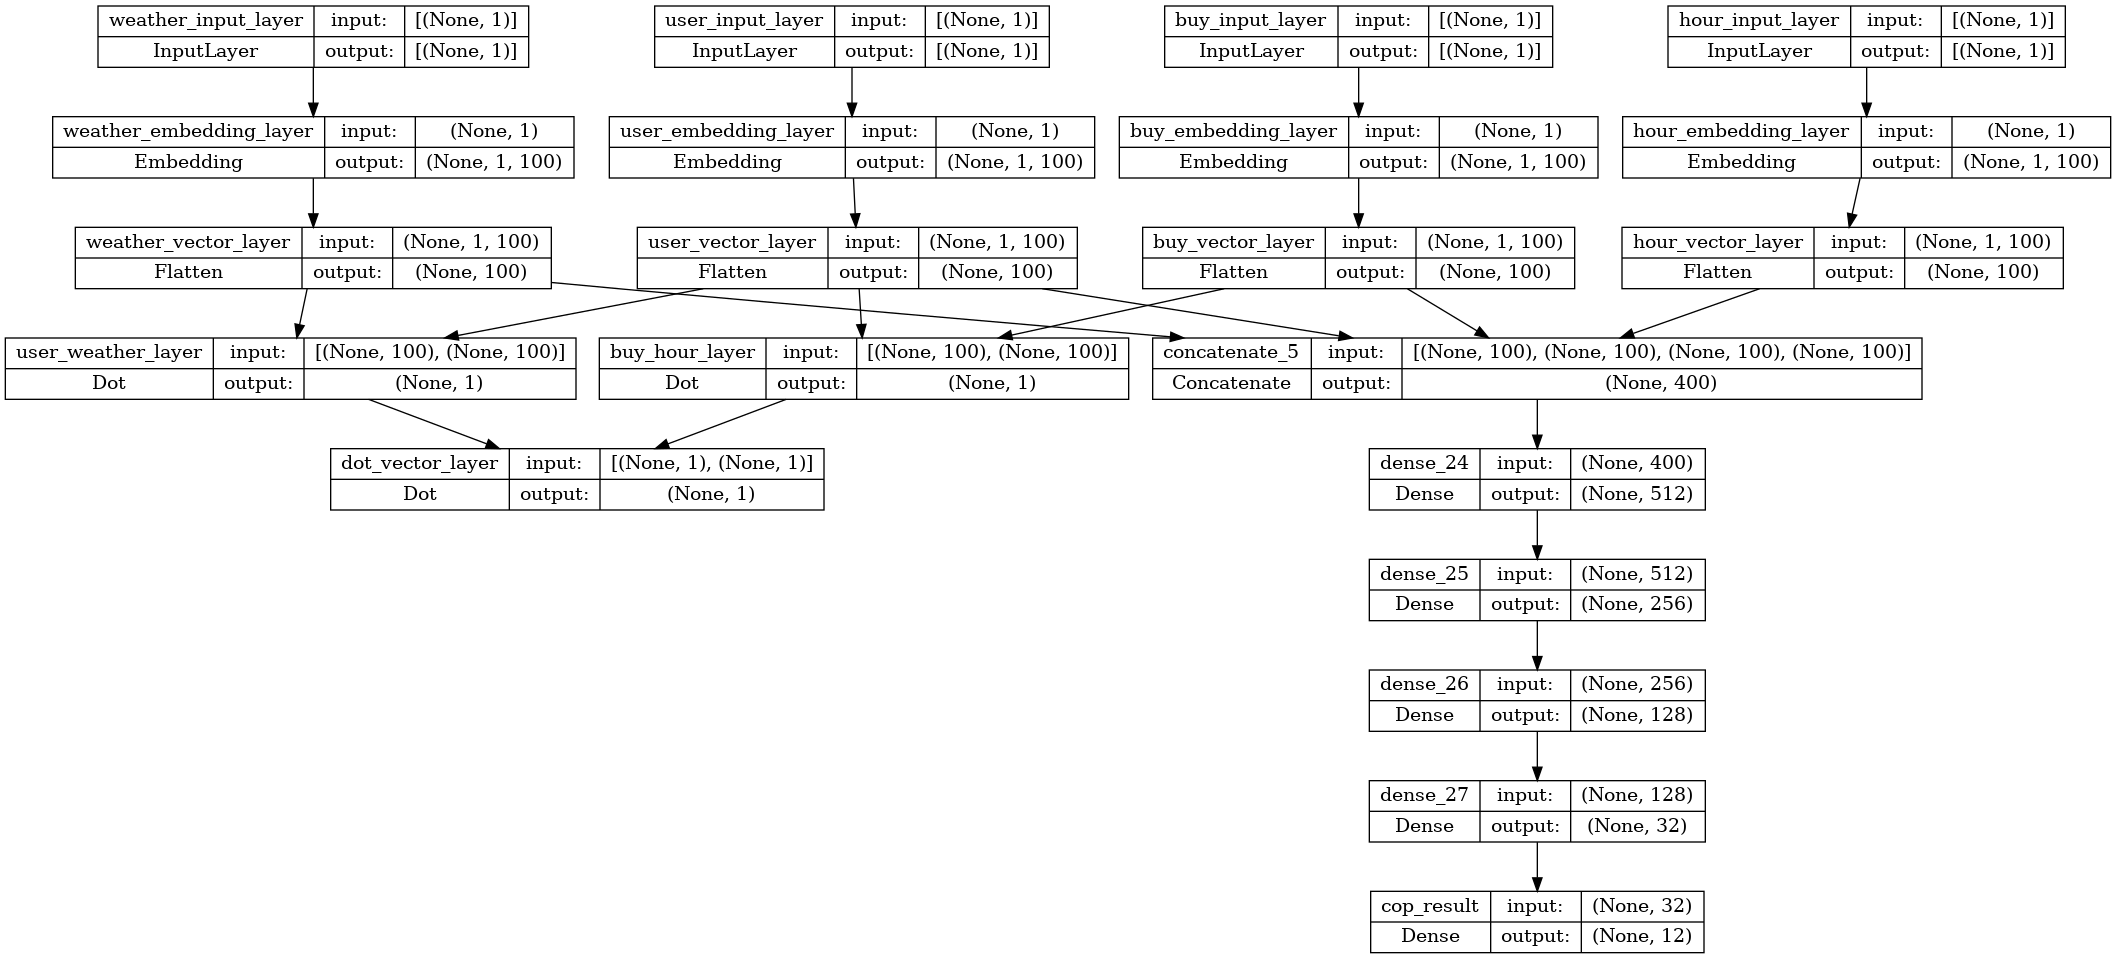

In [57]:
plot_model(model, show_shapes=True)

In [58]:
model.compile(loss = {'dot_vector_layer':'mse', 'cop_result':'sparse_categorical_crossentropy'}, optimizer='adam', metrics={'dot_vector_layer':'mse', 'cop_result':'accuracy'})

In [60]:
istory = model.fit([train['buy_am'], train['cust'], train['aver_temp'], train['de_hr']], {'dot_vector_layer':train['ratings'], 'cop_result':train['cop_c']}, epochs=30, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/30


2022-08-02 17:13:24.666287: W tensorflow/core/framework/op_kernel.cc:1722] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to int64 is not supported


UnimplementedError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/Cast' defined at (most recent call last):
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_125519/1489403428.py", line 1, in <cell line: 1>
      istory = model.fit([train['buy_am'], train['cust'], train['aver_temp'], train['de_hr']], {'dot_vector_layer':train['ratings'], 'cop_result':train['cop_c']}, epochs=30, batch_size=256, validation_split=0.2, verbose=1)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/keras/backend.py", line 5223, in sparse_categorical_crossentropy
      target = cast(target, 'int64')
    File "/home/changhyun/anaconda3/envs/machine_TF2/lib/python3.10/site-packages/keras/backend.py", line 2066, in cast
      return tf.cast(x, dtype)
Node: 'sparse_categorical_crossentropy/Cast'
2 root error(s) found.
  (0) UNIMPLEMENTED:  Cast string to int64 is not supported
	 [[{{node sparse_categorical_crossentropy/Cast}}]]
  (1) CANCELLED:  Function was cancelled before it was started
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_894622]